### Use bag-of-words and bag-of-bigrams to predict ratings.
BIA660D - Group 1: Alec Kulakowski
Here we will explore some basic models applied niavely to simple 1-gram and 1,2-gram representations of the text. Based on performance in this regard, we can explore the most successful of the models in detail later, as well as different representations of the corpus, hyperparameter selection, and feature engineering. 

In [25]:
import pandas as pd
data = pd.read_csv('../BIA660D_Group_1_Project/eda/hoboken_step1.csv')
temp = data.head(3)
reviews = data['user_text']
ratings = data['user_rating']
from sklearn.model_selection import train_test_split
train_reviews, test_reviews, train_ratings, test_ratings = train_test_split(reviews, ratings, test_size=0.15, random_state=1)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(strip_accents='ascii', stop_words='english', binary=True, max_df=0.9, max_features=1000)
vectorizer.fit(train_reviews)
train_bow = vectorizer.transform(train_reviews)
test_bow = vectorizer.transform(test_reviews)
bigram_vectorizer = CountVectorizer(strip_accents='ascii', stop_words='english', binary=True, max_df=0.9, max_features=1000, ngram_range=(1,2))
bigram_vectorizer.fit(train_reviews)
train_bigram = bigram_vectorizer.transform(train_reviews)
test_bigram = bigram_vectorizer.transform(test_reviews)
del data, reviews, ratings, vectorizer, bigram_vectorizer
print(temp)

   user_rating                                          user_text  \
0            5  We booked Grand Vin as our brunch location to ...   
1            4  Sooooo for date night it was his turn to pick ...   
2            5  Adorable little wine bar with outdoor seating ...   

  restaurant_name  restaurant_rating  restaurant_price  \
0       Grand Vin           3.994975               2.0   
1       Grand Vin           4.000000               2.0   
2       Grand Vin           3.994975               2.0   

                             restaurant_type  
0  ['Wine Bars', 'Italian', 'Cocktail Bars']  
1  ['Wine Bars', 'Italian', 'Cocktail Bars']  
2  ['Wine Bars', 'Italian', 'Cocktail Bars']  


So we import the relevant data and examine it. We then select the bare minimum values: the review and the rating. We split this into test and training datasets, and pass it through a binary count vectorizer, first to get a bag-of-words representation, second to get a bag-of-bigrams ( (1,2)-grams) ). Now we can start to fit various models to it. 

In [3]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
hyperparameters = {'tol': 0.005, 'hidden_layer_sizes': (250, 100, 50), 'random_state': 1}
def per(x): return(str(round(100*x,2))+'%')
mlp = MLPClassifier(**hyperparameters)
mlp.fit(train_bow, train_ratings)
regressor = MLPRegressor(**hyperparameters)
regressor.fit(train_bow, train_ratings)
nn_classifier_bow_train = mlp.score(train_bow, train_ratings)
nn_classifier_bow_test = mlp.score(test_bow, test_ratings)
nn_regressor_bow_train = regressor.score(train_bow, train_ratings)
nn_regressor_bow_test = regressor.score(test_bow, test_ratings)
print('Bag-of-Words:')
print('Classifier Results: '+per(nn_classifier_bow_train)+' training accuracy, '+per(nn_classifier_bow_test)+' testing accuracy')
print('Regressor Results: '+per(nn_regressor_bow_train)+' training accuracy, '+per(nn_regressor_bow_test)+' testing accuracy')

Bag-of-Words:
Classifier Results: 99.19% training accuracy, 57.62% testing accuracy
Regressor Results: 97.7% training accuracy, 58.36% testing accuracy


In [4]:
mlp2 = MLPClassifier(**hyperparameters)
regressor2 = MLPRegressor(**hyperparameters)
mlp2.fit(train_bigram, train_ratings)
regressor2.fit(train_bigram, train_ratings)
nn_classifier_bigram_train = mlp2.score(train_bigram, train_ratings)
nn_classifier_bigram_test = mlp2.score(test_bigram, test_ratings)
nn_regressor_bigram_train = regressor2.score(train_bigram, train_ratings)
nn_regressor_bigram_test = regressor2.score(test_bigram, test_ratings)
print('Bag-of-Bigrams:')
print('Classifier Results: '+per(nn_classifier_bigram_train)+' training accuracy, '+per(nn_classifier_bigram_test)+' testing accuracy')
print('Regressor Results: '+per(nn_regressor_bigram_train)+' training accuracy, '+per(nn_regressor_bigram_test)+' testing accuracy')

Bag-of-Bigrams:
Classifier Results: 99.0% training accuracy, 57.75% testing accuracy
Regressor Results: 97.75% training accuracy, 58.07% testing accuracy


In [5]:
from sklearn.svm import LinearSVC #As used by a blogger on Yelp review data 
svm = LinearSVC()
svm2 = LinearSVC()
svm.fit(train_bow, train_ratings)
svm2.fit(train_bigram, train_ratings)
svm_bow_train = svm.score(train_bow, train_ratings)
svm_bow_test = svm.score(test_bow, test_ratings)
svm_bigram_train = svm2.score(train_bigram, train_ratings)
svm_bigram_test = svm2.score(test_bigram, test_ratings)
print('SVM Results:')
print('BOW Results: '+per(svm_bow_train)+' training accuracy, '+per(svm_bow_test)+' testing accuracy')
print('Bigram Results: '+per(svm_bigram_train)+' training accuracy, '+per(svm_bigram_test)+' testing accuracy')

SVM Results:
BOW Results: 60.73% training accuracy, 58.85% testing accuracy
Bigram Results: 60.83% training accuracy, 59.35% testing accuracy


In [21]:
from sklearn.linear_model import PassiveAggressiveClassifier, PassiveAggressiveRegressor
import warnings
warnings.filterwarnings('ignore')
pac = PassiveAggressiveClassifier()
pac2 = PassiveAggressiveClassifier()
par = PassiveAggressiveRegressor()
par2 = PassiveAggressiveRegressor()
pac.fit(train_bow, train_ratings)
par.fit(train_bow, train_ratings)
pac2.fit(train_bigram, train_ratings)
par2.fit(train_bigram, train_ratings)
pac_bow_train = pac.score(train_bow, train_ratings)
pac_bow_test = pac.score(test_bow, test_ratings)
pac_bigram_train = pac2.score(train_bigram, train_ratings)
pac_bigram_test = pac2.score(test_bigram, test_ratings)
par_bow_train = par.score(train_bow, train_ratings)
par_bow_test = par.score(test_bow, test_ratings)
par_bigram_train = par2.score(train_bigram, train_ratings)
par_bigram_test = par2.score(test_bigram, test_ratings)
print('Passive Aggressive Classifier')
print('BOW Results: '+per(pac_bow_train)+' training accuracy, '+per(pac_bow_test)+' testing accuracy')
print('Bigram Results: '+per(pac_bigram_train)+' training accuracy, '+per(pac_bigram_test)+' testing accuracy')
print('Passive Aggressive Regressor')
print('BOW Results: '+per(par_bow_train)+' training accuracy, '+per(par_bow_test)+' testing accuracy')
print('Bigram Results: '+per(par_bigram_test)+' training accuracy, '+per(par_bigram_test)+' testing accuracy')

Passive Aggressive Classifier
BOW Results: 49.6% training accuracy, 48.74% testing accuracy
Bigram Results: 50.4% training accuracy, 48.86% testing accuracy
Passive Aggressive Regressor
BOW Results: -13.26% training accuracy, -14.82% testing accuracy
Bigram Results: -30.71% training accuracy, -30.71% testing accuracy


In [24]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='sag', random_state=1, max_iter=200)
logistic2 = LogisticRegression(solver='sag', random_state=1, max_iter=200)
logistic.fit(train_bow, train_ratings)
logistic2.fit(train_bigram, train_ratings)
log_bow_train = logistic.score(train_bow, train_ratings)
log_bow_test = logistic.score(test_bow, test_ratings)
log_bigram_train = logistic2.score(train_bigram, train_ratings)
log_bigram_test = logistic2.score(test_bigram, test_ratings)
print('Logistic Regression:')
print('BOW: train:'+per(log_bow_train)+', test:'+per(log_bow_test))
print('Bigram: train:'+per(log_bigram_train)+', test:'+per(log_bigram_test))

Logistic Regression:
BOW: train:61.15%, test:59.06%
Bigram: train:61.38%, test:59.73%


In [23]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rfc = RandomForestClassifier(random_state=1, n_estimators = 30) #n_estimators=10
rfc2 = RandomForestClassifier(random_state=1, n_estimators = 30) #n_estimators=10
rfc.fit(train_bow, train_ratings)
rfc2.fit(train_bigram, train_ratings)
rfc_bow_train = rfc.score(train_bow, train_ratings)
rfc_bow_test = rfc.score(test_bow, test_ratings)
rfc_bigram_train = rfc2.score(train_bigram, train_ratings)
rfc_bigram_test = rfc2.score(test_bigram, test_ratings)
print('Random Forest Classifier:')
print('BOW: train:'+per(rfc_bow_train)+', test:'+per(rfc_bow_test))
print('Bigram: train:'+per(rfc_bigram_train)+', test:'+per(rfc_bigram_test))

Random Forest Classifier:
BOW: train:99.97%, test:57.96%
Bigram: train:99.97%, test:58.69%


In [17]:
rfr = RandomForestRegressor(random_state=1, n_estimators=30)
rfr2 = RandomForestRegressor(random_state=1, n_estimators=30) #n_jobs=-1
rfr.fit(train_bow, train_ratings)
rfr2.fit(train_bigram, train_ratings)
rfr_bow_train = rfr.score(train_bow, train_ratings)
rfr_bow_test = rfr.score(test_bow, test_ratings)
rfr_bigram_train = rfr2.score(train_bigram, train_ratings)
rfr_bigram_test = rfr2.score(test_bigram, test_ratings)
print('Random Forest Regressor:')
print('BOW: train:'+per(rfr_bow_train)+', test:'+per(rfr_bow_test))
print('Bigram: train:'+per(rfr_bigram_train)+', test:'+per(rfr_bigram_test))

Random Forest Regressor:
BOW: train:93.4%, test:56.52%
Bigram: train:93.42%, test:56.64%


In [18]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
dtc = DecisionTreeClassifier(random_state=1)
dtc2 = DecisionTreeClassifier(random_state=1)
dtc.fit(train_bow, train_ratings)
dtc2.fit(train_bigram, train_ratings)
dtc_bow_train = dtc.score(train_bow, train_ratings)
dtc_bow_test = dtc.score(test_bow, test_ratings)
dtc_bigram_train = dtc2.score(train_bigram, train_ratings)
dtc_bigram_test = dtc2.score(test_bigram, test_ratings)
print('Decision Tree Classifier:')
print('BOW: train:'+per(dtc_bow_train)+', test:'+per(dtc_bow_test))
print('Bigram: train:'+per(dtc_bigram_train)+', test:'+per(dtc_bigram_test))

Decision Tree Classifier:
BOW: train:99.99%, test:49.15%
Bigram: train:99.99%, test:49.2%


In [19]:
dtr = DecisionTreeRegressor()
dtr2 = DecisionTreeRegressor()
dtr.fit(train_bow, train_ratings)
dtr2.fit(train_bigram, train_ratings)
dtr_bow_train = dtr.score(train_bow, train_ratings)
dtr_bow_test = dtr.score(test_bow, test_ratings)
dtr_bigram_train = dtr2.score(train_bigram, train_ratings)
dtr_bigram_test = dtr2.score(test_bigram, test_ratings)
print('Decision Tree Regressor:')
print('BOW: train:'+per(dtr_bow_train)+', test:'+per(dtr_bow_test))
print('Bigram: train:'+per(dtr_bigram_train)+', test:'+per(dtr_bigram_test))

Decision Tree Regressor:
BOW: train:99.99%, test:18.1%
Bigram: train:99.99%, test:17.26%


In [32]:
models = ['NN_Classifier', 'NN_Regressor', 'SVM', 'PA_Classifier', 'PA_Regressor', 'Logistic', 'RF_Classifier', 'RF_Regressor', 'DT_Classifier', 'DT_Regressor']
results = [['Bag-of-Words Training', 'Bag-of-Words Test', 'Bag-of-Bigrams Training', 'Bag-of-Bigrams Test'],
           [nn_classifier_bow_train, nn_classifier_bow_test, nn_classifier_bigram_train, nn_classifier_bigram_test],
           [nn_regressor_bow_train, nn_regressor_bow_test, nn_regressor_bigram_train, nn_regressor_bigram_test],
           [svm_bow_train, svm_bow_test, svm_bigram_train, svm_bigram_test],
           [pac_bow_train, pac_bow_test, pac_bigram_train, pac_bigram_test],
           [par_bow_train, par_bow_test, par_bigram_train, par_bigram_test],
           [log_bow_train, log_bow_test, log_bigram_train, log_bigram_test],
           [rfc_bow_train, rfc_bow_test, rfc_bigram_train, rfc_bigram_test],
           [rfr_bow_train, rfr_bow_test, rfr_bigram_train, rfr_bigram_test],
           [dtc_bow_train, dtc_bow_test, dtc_bigram_train, dtc_bigram_test],
           [dtr_bow_train, dtr_bow_test, dtr_bigram_train, dtr_bigram_test]]
result_df = pd.DataFrame(results[1:], columns = results[0], index = models)
# result_df = pd.DataFrame.from_csv('../BIA660D_Group_1_Project/prediction/bagofwords.csv') # in case of errors use this
result_df

,Bag-of-Words Training,Bag-of-Words Test,Bag-of-Bigrams Training,Bag-of-Bigrams Test
NN_Classifier,0.991911,0.576215,0.990019,0.577466
NN_Regressor,0.976990,0.583614,0.977513,0.580725
SVM,0.607263,0.588456,0.608304,0.593549
PA_Classifier,0.495987,0.487402,0.504029,0.488563
PA_Regressor,-0.132630,-0.148169,-0.304142,-0.307087
Logistic,0.611489,0.590600,0.613759,0.597302
RF_Classifier,0.999700,0.579610,0.999748,0.586937
RF_Regressor,0.933987,0.565248,0.934165,0.566366
DT_Classifier,0.999921,0.491512,0.999921,0.492048
DT_Regressor,0.999882,0.180993,0.999882,0.172578


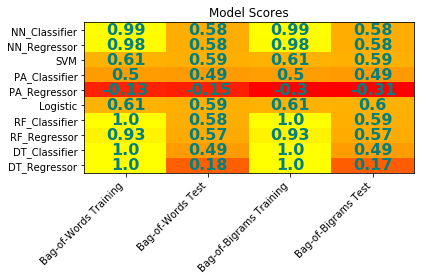

In [93]:
import matplotlib.pyplot as plt 
import numpy as np
figure, axes = plt.subplots()
the_plot = axes.imshow(result_df, cmap='autumn', aspect='auto')
axes.set_xticks(np.arange(len(result_df.columns)))
axes.set_yticks(np.arange(len(result_df.index)))
axes.set_xticklabels(result_df.columns)
axes.set_yticklabels(result_df.index)
plt.setp(axes.get_xticklabels(), rotation=45, ha="right")
for row_n in range(len(result_df)):
    for col_n in range(len(result_df.columns)):
        text = axes.text(col_n, row_n, round(result_df.iloc[row_n, col_n],2),\
                         ha='center', va='center', size='16', weight='bold', color='teal')
axes.set_title('Model Scores')
figure.tight_layout()
plt.show()

Notes:

The SVM in question has a linear Kernal, and is based on 
http://www.developintelligence.com/blog/2017/03/predicting-yelp-star-ratings-review-text-python/

Classifier's have an advantage in terms of accuracy because the output is restricted to one of the valid options 
(int 1,2,3,4,5) regressors can be any number, it can result in numbers way outside the possible range of valid 
outcomes and it can also result in numbers within the range but not exactly equal to any valid number (like floats
between 1 and 2). Classifier accuracy can be judged based on whether or not they got the right value, with no partial
credit assigned for getting values close to it. Since it must be one out of 5 possible options, there's a chance of 
getting it right or getting an above average accuracy even with a weak predictor model. For the regressors, accuracy
is judged by R^2^ which even allows for a negative accuracy (as happened with the Passive Aggressive regressor). 
we can't avoid this or alter the 'score' metric easily as sklearn does not allow alternate error metrics or scores
including Adjusted R^2^ or MSE or something similar. A weak predicting regressor would likely have a very low chance 
of getting anywhere near the correct value without being part of some gradient boosting system. Therefore, even though
the classifiers outperformed the regressors accross-the-board in terms of score, if we take into account the scores and
the a priori notion that regressors allow for the linearity of features and the relation between ratings, then we should
accept a slightly lower score from a regressor as being comparable to a slightly higher score from a classifier on the 
same data. A notable comment to be made regarding the use of regressors is that the distance between the output labels
matters. On Yelp rating data in particular, it would make the implicit assumption that the difference between a 1-star
rating and a 2-star rating is the same as the difference between a 4-star and a 5-star rating and half the difference
between a 2-star and 4-star rating and so on. This is not necessarily the case as Yelp never claims that it is a 
perfectly linear scale and Yelp users do not use it as such. 

More information on this subject can be gleaned from examilning the distribution of Yelp review ratings and restauarant
ratings in our other EDA files, the ratings are not normally distributed, nor are they distributed in a way where one
could assume a priori that they are a linear function. Review ratings have a negative skew, and are highly concentrated
at the ratings 4 and 5. Restaurant ratings also have a negative skew, but since they are a mean of a sample of the 
previously discussed distribution, they are much more concentrated, with high frequencies for 3 and 4 and negligible 
frequency for all other values. 

Memory errors were encountered when using K-Nearest Neighbors Classifier and Regressor. I may try them again in a 
document where they are used alone, perhaps also using some Radius Neighbor methods. 

Now we try one more method, as used in a blog post on similar Yelp review-rating data: the Multinomial Naive Bayes.  

In [33]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb2 = MultinomialNB()
nb.fit(train_bow, train_ratings)
nb2.fit(train_bigram, train_ratings)
mnb_bow_train = nb.score(train_bow, train_ratings)
mnb_bow_test = nb.score(test_bow, test_ratings)
mnb_bigram_train = nb2.score(train_bigram, train_ratings)
mnb_bigram_test = nb2.score(test_bigram, test_ratings)
print("Multinomial Naive Bayes Results:")
print('BOW: train: '+per(mnb_bow_train)+', test: '+per(mnb_bow_test))
print('Bigram: train: '+per(mnb_bigram_train)+', test: '+per(mnb_bigram_test))

Multinomial Naive Bayes Results:
BOW: train:58.04%, test:57.91%
Bigram: train:58.08%, test:57.73%


If we compare the results from the Naive Bayes to the results of the other classifiers above, we can see that while the test scores are comparable to the best of those that were reviewed, the training accuracy was signifigantly lower (similar to the behavior of the linear-kernal support vector machine, passive aggressive methods, and the logistic regression). 

Since the training and test score were so near to each other (as we had with the SVM, PA, and Logistic models) that's a pretty good assurance that it's not overfitting the training data, however, the low score during training serves as a bound for maximum expected accuracy on the test data. Thus, even using the best of these options, the most accuracy we can hope for would be roughly 61% in the best case scenario. With tuning and exploration of alternative hyperparameters that training accuracy could potentially be improved, and the test accuracy would likely follow close behind. 

If, however, we chose a model with a greater training-test disparity such as the random forest or neural networks, (certainly not the decision trees, which had a large disparity between training and test scores but also had some of the worst test accuracy metrics overall) our focus can be on preventing overfitting. Random forests and neural networks also typically have many more tunable hyperparameters than the alternative models which were tested. This means that the number of possible configurations is greater and since each configuration could be the one that overfits less or learns more valuable information about the data, one is a priori tempted to think that the chance of finding a successful model is better between these two options. The no free lunch theorem tells us that just because these models are more tunable, they aren't necessarily going to work better then the alternatives. 